## Case Study 
# Covid-19 in Australia, and the Myths and Realities of Exponential Growth

New concepts

* Introducing time-series data
* Using GroupBy to group data
* Growth rates
* Curve fitting

Reinforced concepts

* File IO
* File formats
* Data/object types
* Data selection and manipulation with pandas (and friends)
* Using apply and lambda functions
* Using list comprehensions
* Plotting data with pyplot (and pandas directly)
* Using subplots

## Finding a Reliable Covid-19 Data Source

There are many possible sources of data (of varying quality and veracity). We always look for a trusted source of data, such as the World Health Organisation (WHO).

Academics from John Hopkins University have done a great job of collecting data from reliable sources (including WHO) and making it publicly available as a "[dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)". Note that the data sources (as well as a short article in the Journal [_Lancet_](https://www.sciencedirect.com/science/article/pii/S1473309920301201?via%3Dihub) are provided at the bottom of the page.

The authors also provide a link to the data sources on [Github](https://github.com/CSSEGISandData/COVID-19). The data is shared and downloadable.

(This is an example of best practice in sharing and documenting data for the common good!)

### A first look at the data

The package downloaded from Github contains the following files:

```
datapackage.json
process.py
README.md
time-series-19-covid-combined.csv
```

> _Q: What types are they and what do you anticipate they will contain?_

Lets look at them in a terminal and see if we're right &rarr;

Jupyter Lab can handle all of these file types, so lets take a closer look using Jupyter Lab &rarr;

Lets use some of our skills learnt so far to read in the data, inspect it more closely, and extract the data we're interested in.

## Data Extraction

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

Since this case study was first written, new versions of the time series data have been made available, including a `json` version. 

In our second Covid-19 case study we will investigate using the json version. As we know json is a structured format - essentially a dictionary - and is able to include more metadata. We would expect it to be more effective and robust to changes in the data. Let's take a look.

First, let's have a look at the json data file &rarr;

---

Can it be loaded directly into a dataframe?

In [ ]:

COVID_TIMESERIES_JSON="Data/2020-03-23-time-series-19-covid-combined.json"
covid_json = pd.read_json(COVID_TIMESERIES_JSON)
covid_json

In [ ]:
for datum in covid_json.iloc[0]:
    print(type(datum))

In [ ]:
dtypes = {
          "Country/Region": 'str',
          "Province/State": 'str',
          "Lat": np.float64,
          "Long": np.float64,
          "Confirmed": np.int64,
          "Recovered": np.int64,
          "Deaths": np.int64
         }

covid_json = pd.read_json(COVID_TIMESERIES_JSON, dtype=dtypes)
for datum in covid_json.iloc[0]:
    print(type(datum))

In [ ]:
covid_json

In [ ]:
recovered = covid_json["Recovered"]
recovered.head()

### CSV

In [117]:
COVID_TIMESERIES_CSV="Data/2020-03-23-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23

dtypes = {
          "Country/Region": 'str',
          "Province/State": 'str',
          "Lat": np.float64,
          "Long": np.float64,
          "Confirmed": np.int64,
          "Recovered": np.int64,
          "Deaths": np.int64
         }
covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"], dtype=dtypes)
covid_csv

ValueError: Integer column has NA values in column 5

Computer says "no"...

In [118]:
np.int64(np.NaN)

ValueError: cannot convert float NaN to integer

More data cleaning needed 🙄

Start with default types...

In [119]:
covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"])
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)
covid_csv

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,NaN,15.0000,101.0,2.0,0.0,0.0
1,2020-01-23,Thailand,NaN,15.0000,101.0,3.0,0.0,0.0
2,2020-01-24,Thailand,NaN,15.0000,101.0,5.0,0.0,0.0
3,2020-01-25,Thailand,NaN,15.0000,101.0,7.0,0.0,0.0
4,2020-01-26,Thailand,NaN,15.0000,101.0,8.0,2.0,0.0
...,...,...,...,...,...,...,...,...
31057,2020-03-19,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31058,2020-03-20,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31059,2020-03-21,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0
31060,2020-03-22,The Gambia,NaN,13.4667,-16.6,0.0,0.0,0.0


In [120]:
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed           float64
Recovered           float64
Deaths              float64
dtype: object

In [121]:
[type(datum) for datum in covid_csv.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 float,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

In [122]:
covid_csv.isna()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
31057,False,False,True,False,False,False,False,False
31058,False,False,True,False,False,False,False,False
31059,False,False,True,False,False,False,False,False
31060,False,False,True,False,False,False,False,False


In [123]:
nas = covid_csv.filter(["Confirmed","Recovered","Deaths"]).isna()
nas

,Confirmed,Recovered,Deaths
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31057,False,False,False
31058,False,False,False
31059,False,False,False
31060,False,False,False


In [124]:
nas.any()

Confirmed    True
Recovered    True
Deaths       True
dtype: bool

In [125]:
covid_csv.loc[nas["Recovered"]]

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
13019,2020-03-23,US,"Kitsap, WA",47.6477,-122.6413,NaN,NaN,NaN
13081,2020-03-23,US,"Solano, CA",38.3105,-121.9018,NaN,NaN,NaN
13143,2020-03-23,US,"Santa Cruz, CA",37.0454,-121.9580,NaN,NaN,NaN
13205,2020-03-23,US,"Napa, CA",38.5025,-122.2654,NaN,NaN,NaN
13267,2020-03-23,US,"Ventura, CA",34.3705,-119.1391,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
24613,2020-03-23,US,"Bernalillo, NM",35.0178,-106.6291,NaN,NaN,NaN
24675,2020-03-23,US,"Oakland, MI",42.5922,-83.3362,NaN,NaN,NaN
24737,2020-03-23,US,"Wayne, MI",42.2791,-83.3362,NaN,NaN,NaN
24799,2020-03-23,US,"New Castle, DE",39.5393,-75.6674,NaN,NaN,NaN


Our policy for missing data will be to:
* accept missing States, set these to the empty string
* accept entries where Recovered or Deaths are empty, and set these to zero
* reject entries where Confirmed cases is empty

In [126]:
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")

Check Recovered and Deaths...

In [127]:
covid_csv.loc[nas["Recovered"]]

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
13019,2020-03-23,US,"Kitsap, WA",47.6477,-122.6413,NaN,0,0
13081,2020-03-23,US,"Solano, CA",38.3105,-121.9018,NaN,0,0
13143,2020-03-23,US,"Santa Cruz, CA",37.0454,-121.9580,NaN,0,0
13205,2020-03-23,US,"Napa, CA",38.5025,-122.2654,NaN,0,0
13267,2020-03-23,US,"Ventura, CA",34.3705,-119.1391,NaN,0,0
...,...,...,...,...,...,...,...,...
24613,2020-03-23,US,"Bernalillo, NM",35.0178,-106.6291,NaN,0,0
24675,2020-03-23,US,"Oakland, MI",42.5922,-83.3362,NaN,0,0
24737,2020-03-23,US,"Wayne, MI",42.2791,-83.3362,NaN,0,0
24799,2020-03-23,US,"New Castle, DE",39.5393,-75.6674,NaN,0,0


Check State...

In [128]:
covid_csv

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Thailand,,15.0000,101.0,2.0,0,0
1,2020-01-23,Thailand,,15.0000,101.0,3.0,0,0
2,2020-01-24,Thailand,,15.0000,101.0,5.0,0,0
3,2020-01-25,Thailand,,15.0000,101.0,7.0,0,0
4,2020-01-26,Thailand,,15.0000,101.0,8.0,2,0
...,...,...,...,...,...,...,...,...
31057,2020-03-19,The Gambia,,13.4667,-16.6,0.0,0,0
31058,2020-03-20,The Gambia,,13.4667,-16.6,0.0,0,0
31059,2020-03-21,The Gambia,,13.4667,-16.6,0.0,0,0
31060,2020-03-22,The Gambia,,13.4667,-16.6,0.0,0,0


What effect has `downcast` had? How well did pandas infer?

In [129]:
[type(datum) for datum in covid_csv.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64]

In [130]:
covid_csv.isna().any()

Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed     True
Recovered    False
Deaths       False
dtype: bool

The only column with missing data is now Confirmed. So according to our policy we can now drop all rows with missing data.

In [131]:
covid_csv.dropna(inplace=True)

In [137]:
covid_csv.isna().any()

Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool

In [138]:
len(covid_csv)

30870

In [143]:
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [144]:
covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64}, copy=False)
covid_csv.dtypes

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [136]:
[type(datum) for datum in covid.iloc[0]]

[pandas._libs.tslibs.timestamps.Timestamp,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 numpy.int64]

In [146]:
COVID_TIMESERIES_CSV="Data/2020-03-24-time-series-19-covid-combined.csv"
# Due to changing data results may differ for data other than 2020-03-23

covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, parse_dates=["Date"])
print("Reading", len(covid_csv), "rows.")
covid_csv.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                 inplace=True)
print("\nMissing data before replacement:")
print(covid_csv.isna().any())
covid_csv.fillna(value={"Recovered": 0, "Deaths": 0, "State": ''}, 
                 inplace=True, downcast="infer")
print("\nMissing data after replacement:")
print(covid_csv.isna().any())
covid_csv.dropna(inplace=True)
print("\n")
print(len(covid_csv), "rows remaining.")

covid_csv = covid_csv.astype(dtype = {"Confirmed": np.int64})
print(covid_csv.dtypes)

print("Classes:", [type(datum) for datum in covid.iloc[0]])


Reading 15183 rows.

Missing data before replacement:
Date         False
Country      False
State         True
Lat          False
Long         False
Confirmed    False
Recovered     True
Deaths       False
dtype: bool

Missing data after replacement:
Date         False
Country      False
State        False
Lat          False
Long         False
Confirmed    False
Recovered    False
Deaths       False
dtype: bool


15183 rows remaining.
Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object
Classes: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>]


In [ ]:
covid_csv.loc[covid_csv["Country/Region"] == "Belize"]

In [ ]:
dtypes = {
          "Country/Region": 'str',
          "Province/State": 'str',
          "Lat": np.float64,
          "Long": np.float64,
          "Confirmed": np.int64,
          "Recovered": np.int64,
          "Deaths": np.int64
         }

covid_csv = pd.read_csv(COVID_TIMESERIES_CSV, na_filter=False, dtype = dtypes)
covid_csv

In [ ]:
jsort = covid_json.sort_values(["Date","Country/Region"])
csort = covid_csv.sort_values(["Date","Country/Region"])
print(jsort.head())
print(csort.head())

In [ ]:
print(type(csort["Date"][0]))
print(type(jsort["Date"][0]))


    


In [ ]:
diff_df = pd.merge(jsort, csort, how='outer', indicator='Exist')


In [ ]:

diff_df = diff_df.loc[diff_df['Exist'] != 'both']



In [ ]:
import json
with open(COVID_TIMESERIES_JSON,'r') as f:
    data = json.load(f)
data

In [ ]:
# Using data from 16th March, 2020
COVID_DATA="Data/2020-03-22-time-series-19-covid-combined.csv"
data = pd.read_csv(COVID_DATA)
data

In [ ]:
data.dtypes

The actual data type can vary within the same column:

In [ ]:
for datum in data.iloc[0]:
    print(type(datum))

In [ ]:
data.loc[data["Country/Region"] == "United Kingdom"].tail(2)

In [ ]:
for datum in data.loc[data["Country/Region"] == "United Kingdom"].iloc[0]:
    print(type(datum))

> _Q: How successful has pandas been at inferring data types?_

> _What types would you choose?_

Lets try again. Starting with the province:

In [ ]:
data = pd.read_csv(COVID_DATA, na_filter=False)
data

In [ ]:
for datum in data.iloc[0]:
    print(type(datum))

What about the Date column?

> _Q: Why is storing date and time information as strings not particularly useful?_



### Extracting the Australian data

In [147]:
covid = covid_csv
aus_covid = covid[covid["Country"] == "Australia"]
aus_covid

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
504,2020-01-22,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,0
505,2020-01-23,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,0
506,2020-01-24,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,0
507,2020-01-25,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,0
508,2020-01-26,Australia,Australian Capital Territory,-35.4735,149.0124,0,0,0
...,...,...,...,...,...,...,...,...
1003,2020-03-20,Australia,Western Australia,-31.9505,115.8605,64,0,1
1004,2020-03-21,Australia,Western Australia,-31.9505,115.8605,90,0,1
1005,2020-03-22,Australia,Western Australia,-31.9505,115.8605,120,0,1
1006,2020-03-23,Australia,Western Australia,-31.9505,115.8605,140,0,1


## Data Exploration using Bar Plots

## New Data Format

In this part we'll make use of yet another data format provided by CSSE at [John Hopkins Univeristy](https://github.com/CSSEGISandData/COVID-19). CSSE warned of [upcoming changes](https://github.com/CSSEGISandData/COVID-19/issues/1250) to their data structures on 22/3/2020. Using this format gives quickest access to the data.

Let's jump straight in.

In [625]:
DATE = "2020-03-29"
RAW_DATA = "Data/"
CLEAN_DATA = "Cleaned Data/"
JHU = "csse_covid_19_time_series/"
CONFIRMED = "time_series_covid19_confirmed_global"
DEATHS = "time_series_covid19_deaths_global"
CSV = ".csv"
JSON = ".json"
# Due to changing data results may differ for data other than 2020-03-25

def update_data (date=DATE):
    confirmed = pd.read_csv(RAW_DATA+date+'/'+JHU+CONFIRMED+CSV)
    deaths = pd.read_csv(RAW_DATA+date+'/'+JHU+DEATHS+CSV)
    confirmed.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                     inplace=True)
    deaths.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                     inplace=True)
    dates = confirmed.columns.drop(["State","Country","Lat","Long"])
    return (confirmed, deaths)

(confirmed, deaths) = update_data("2020-03-31")
confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [626]:
confirmed.dtypes

State       object
Country     object
Lat        float64
Long       float64
1/22/20      int64
            ...   
3/27/20      int64
3/28/20      int64
3/29/20      int64
3/30/20      int64
3/31/20      int64
Length: 74, dtype: object

In [627]:
[type(datum) for datum in confirmed.loc[0]][:10]

[float,
 str,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64]

In [628]:
confirmed.columns

Index(['State', 'Country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20'],
      dtype='object')

In [629]:
dates = confirmed.columns.drop(["State","Country","Lat","Long"])
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20'],
      dtype='object')

In [630]:
confirmed[dates].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,0,0,0,0,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,0,0,0,0,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7


In [631]:
datetimes = pd.DatetimeIndex(dates)
datetimes

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

### Australian data

In [632]:
aus_confirmed = confirmed.loc[(confirmed["Country"] == "Australia") & 
                     (confirmed["State"] != "From Diamond Princess")]
aus_confirmed

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,5,5,6,6,12,12,15,15,15,17
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,259,319,397,443,493,555,625,656,689,743
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,100,134,170,170,235,257,287,299,305,337
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,22,28,28,36,47,47,62,66,66,69
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,355,355,411,466,520,574,685,769,821,917
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,120,140,175,175,231,231,278,311,355,364


In [638]:
aus_total = aus_confirmed[dates].sum()
aus_total

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       4
           ... 
3/27/20    3143
3/28/20    3640
3/29/20    3984
3/30/20    4361
3/31/20    4559
Length: 70, dtype: int64

In [639]:
aus_deaths = deaths.loc[(deaths["Country"] == "Australia") & 
                     (deaths["State"] != "From Diamond Princess")]
aus_deaths

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,6,6,7,7,7,7,8,8,8,8
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,2,2
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,...,0,0,0,0,3,3,3,4,4,4
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2


Start from the first recorded case...

In [640]:
aus_confirmed[dates].any()

1/22/20    False
1/23/20    False
1/24/20    False
1/25/20    False
1/26/20     True
           ...  
3/27/20     True
3/28/20     True
3/29/20     True
3/30/20     True
3/31/20     True
Length: 70, dtype: bool

In [641]:
aus_dates = dates.to_series()[aus_confirmed[dates].any()]
aus_dates.head()

1/26/20    1/26/20
1/27/20    1/27/20
1/28/20    1/28/20
1/29/20    1/29/20
1/30/20    1/30/20
dtype: object

In [642]:
len(aus_dates)

66

In [643]:
WA_confirmed = aus_confirmed[(aus_confirmed["State"] == "Western Australia")].squeeze()
WA_deaths = aus_deaths[(aus_deaths["State"] == "Western Australia")].squeeze()
WA_confirmed.head(7)

State      Western Australia
Country            Australia
Lat                 -31.9505
Long                 115.861
1/22/20                    0
1/23/20                    0
1/24/20                    0
Name: 15, dtype: object

In [644]:
print(type(WA_confirmed))
print(type(WA_confirmed[aus_dates]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


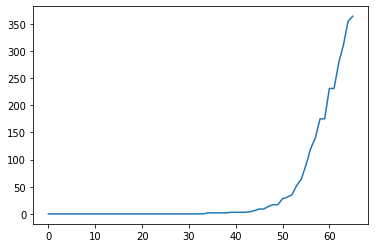

In [645]:
plt.plot(np.arange(len(aus_dates)),WA_confirmed[aus_dates])
plt.show()

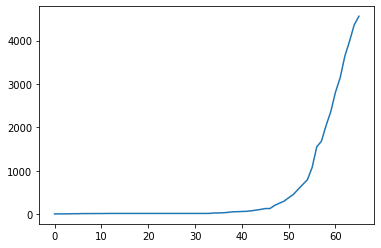

In [646]:
plt.plot(np.arange(len(aus_dates)),aus_total[aus_dates])
plt.show()

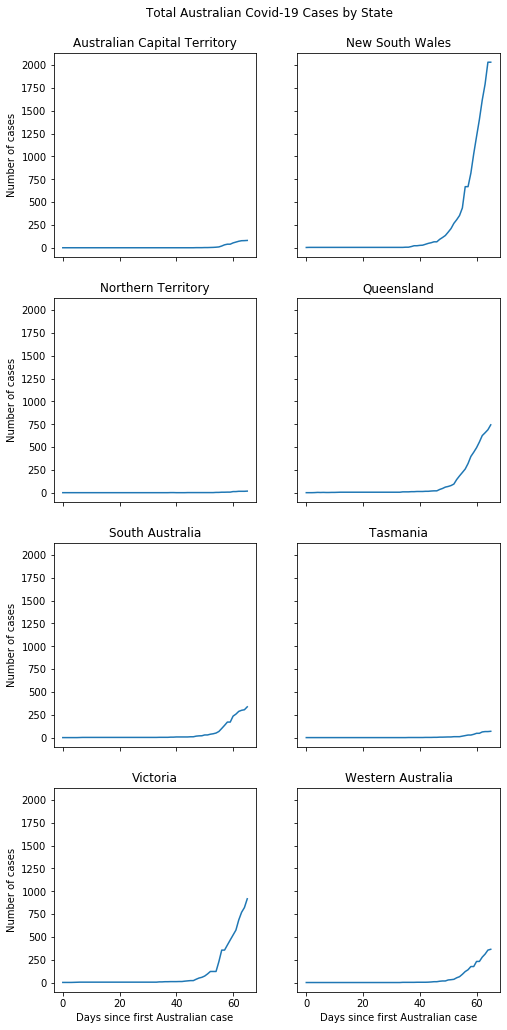

In [647]:
numstates = len(aus_confirmed)
numrows = int(round(np.ceil(numstates/2.0))) 
days = np.arange(len(aus_dates))

# Set up subplots and position 'pointer'
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows), sharex='all', sharey='all') # length of figure depends on number of rowsposition = 0
position = 0

# Iterate through each state/plot
for rowdata in aus_confirmed.iterrows():
    state = rowdata[1]
    (row, col) = np.divmod(position,2)
    position = position + 1
    
    # Add lines to the plot 
    axs[row, col].plot(days, state[aus_dates])
    
    # Label individual plot
    axs[row, col].set_title(state["State"])
#    axs[row, col].legend(loc='upper left')
    if row == numrows-1:
        axs[row, col].set_xlabel("Days since first Australian case")
    if col == 0:
        axs[row, col].set_ylabel("Number of cases")

# Set overall figure title and show figure
fig.suptitle("Total Australian Covid-19 Cases by State")
fig.subplots_adjust(top=0.94) # cludge to get suptitle at the right height
plt.show()

In [648]:
aus_population = {
    "New South Wales": 8118000,
    "Victoria": 6629900,
    "Queensland": 5115500,
    "South Australia": 1756500,
    "Western Australia": 2630600,
    "Tasmania": 535500,
    "Northern Territory": 245600,
    "Australian Capital Territory": 428100
}

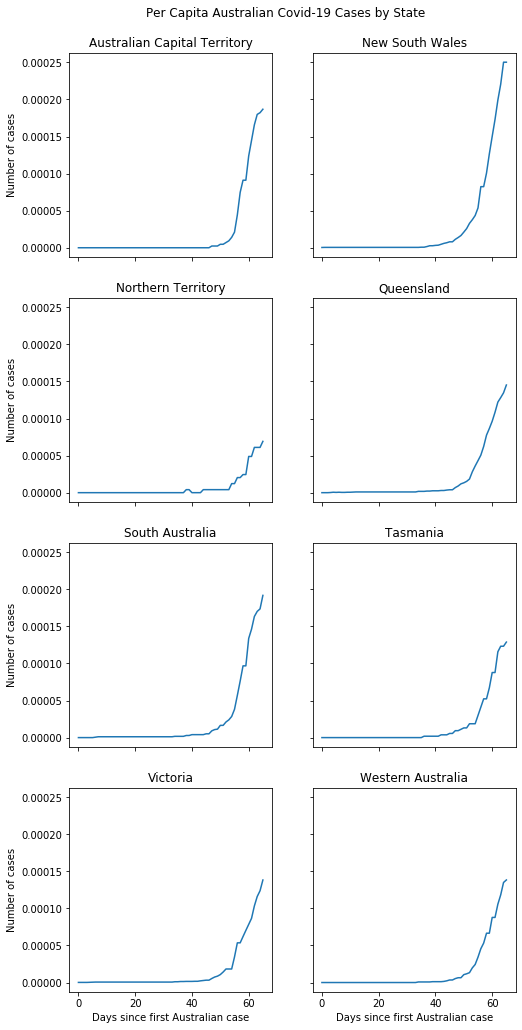

In [649]:
numstates = len(aus_confirmed)
numrows = int(round(np.ceil(numstates/2.0))) 
days = np.arange(len(aus_dates))

# Set up subplots and position 'pointer'
fig, axs = plt.subplots(numrows, 2, figsize=(8,4*numrows), sharex='all', sharey='all') # length of figure depends on number of rowsposition = 0
position = 0

# Iterate through each state/plot
for rowdata in aus_confirmed.iterrows():
    state = rowdata[1]
    (row, col) = np.divmod(position,2)
    position = position + 1
    
    # Add lines to the plot 
    axs[row, col].plot(days, state[aus_dates]/aus_population[state["State"]])
    
    # Label individual plot
    axs[row, col].set_title(state["State"])
#    axs[row, col].legend(loc='upper left')
    if row == numrows-1:
        axs[row, col].set_xlabel("Days since first Australian case")
    if col == 0:
        axs[row, col].set_ylabel("Number of cases")

# Set overall figure title and show figure
fig.suptitle("Per Capita Australian Covid-19 Cases by State")
fig.subplots_adjust(top=0.94) # cludge to get suptitle at the right height
plt.show()

In [178]:
def my_exp2 (x, a, b):
    return (np.exp2(a*x + b))

In [650]:
def my_expon2 (x, loc, scale):
    return (np.exp2((x - loc)/scale)/scale)

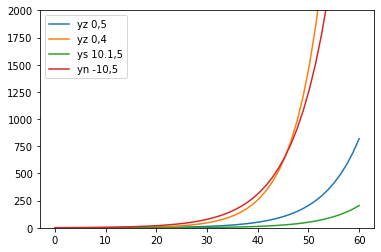

In [651]:
xs = np.linspace(0, 60)
yz = my_expon2(xs, 0, 5)
yz4 = my_expon2(xs, 0, 4)
ys = my_expon2(xs, 10, 5)
yn = my_expon2(xs, -13, 5)
plt.ylim(0,2000)
plt.plot(xs, yz, label="yz 0,5")
plt.plot(xs, yz4, label="yz 0,4")
plt.plot(xs, ys, label="ys 10.1,5")
plt.plot(xs, yn, label="yn -10,5")
plt.legend()
plt.show()


### States

Parameters: 14.354380709527181 4.651225321081382
Parameters: 18.354516582898754 4.651213721184643
Lambda: 0.21
Lambda: 0.21


<function matplotlib.pyplot.show(*args, **kw)>

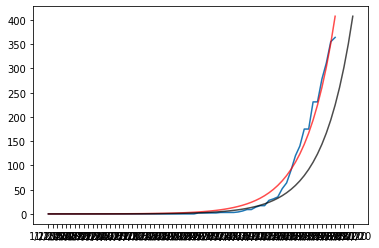

In [652]:
from scipy.optimize import curve_fit
numdays = len(aus_dates)
days = np.arange(numdays)

plt.plot(days, WA_confirmed[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, WA_confirmed[aus_dates])
((loc2, scale2), covariance2) = curve_fit(my_expon2, np.arange(len(dates)), WA_confirmed[dates])

optimised_guesses = my_expon2(days, loc, scale)
optimised_guesses2 = my_expon2(np.arange(len(dates)), loc2, scale2)

print("Parameters:", loc, scale)
print("Parameters:", loc2, scale2)

print("Lambda:", round(1/scale,2))
print("Lambda:", round(1/scale2,2))


plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.plot(dates, optimised_guesses2, alpha=0.7, color='black')


plt.show


Parameters: 3.4505894114328117 4.601106050808403
Lambda: 0.22


<function matplotlib.pyplot.show(*args, **kw)>

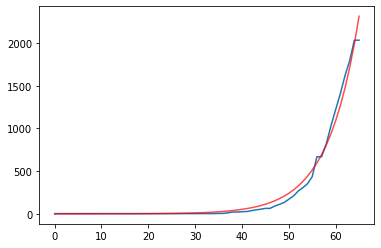

In [653]:
NSW = aus_confirmed[(aus_confirmed["State"] == "New South Wales")].squeeze()
plt.plot(days,NSW[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, NSW[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: 6.856295288873297 4.764374268951886
Lambda: 0.21


<function matplotlib.pyplot.show(*args, **kw)>

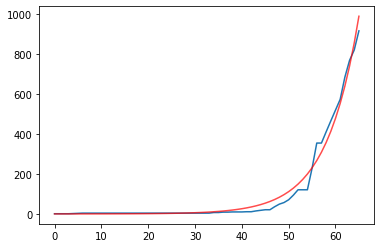

In [654]:
VIC = aus_confirmed[(aus_confirmed["State"] == "Victoria")].squeeze()
plt.plot(days,VIC[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, VIC[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

### Countries

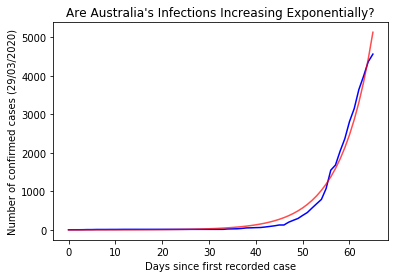

Parameters: -4.054479352649335 4.739991272801768
Lambda: 0.21


<function matplotlib.pyplot.show(*args, **kw)>

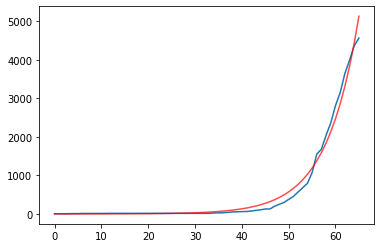

In [655]:
numdays = len(aus_dates)
xs = np.arange(numdays)
((loc, scale), covariance) = curve_fit(my_expon2, xs, aus_total[aus_dates])
plt.plot(xs,aus_total[aus_dates], color='blue')
optimised_guesses = my_expon2(xs, loc, scale)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed cases (29/03/2020)")
plt.title("Are Australia's Infections Increasing Exponentially?")
plt.show()

plt.plot(days,aus_total[aus_dates])

optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -75.42068216953605 7.123944586037779
Lambda: 0.14


<function matplotlib.pyplot.show(*args, **kw)>

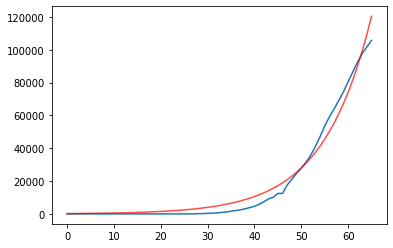

In [656]:
italy_covid = confirmed[confirmed["Country"] == "Italy"].squeeze()
plt.plot(days,italy_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, italy_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -26.9937150872023 4.853545899165383
Lambda: 0.21


<function matplotlib.pyplot.show(*args, **kw)>

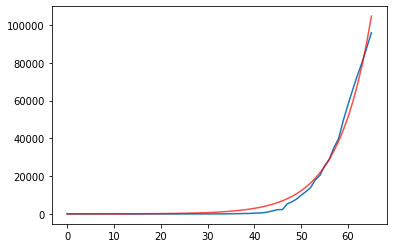

In [657]:
spain_covid = confirmed[confirmed["Country"] == "Spain"].squeeze()
plt.plot(days,spain_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, spain_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -4.054479352649335 4.739991272801768
Lambda: 0.21


<function matplotlib.pyplot.show(*args, **kw)>

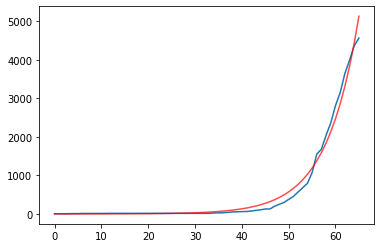

In [658]:
plt.plot(days,aus_total[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, aus_total[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -5.4228410589154565 3.619268538429141
Lambda: 0.28


<function matplotlib.pyplot.show(*args, **kw)>

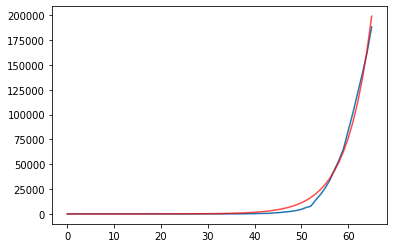

In [659]:
us_covid = confirmed[confirmed["Country"] == "US"].squeeze()
plt.plot(days,us_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, us_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: 24.564696104387043 2.6595570282172547
Lambda: 0.38


<function matplotlib.pyplot.show(*args, **kw)>

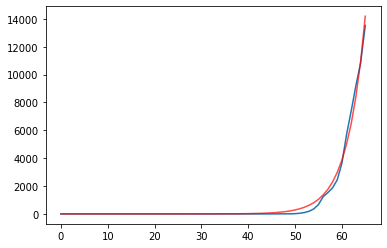

In [660]:
turkey_covid = confirmed[confirmed["Country"] == "Turkey"].squeeze()
plt.plot(days,turkey_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, turkey_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -216.47631534907234 15.991249441447408
Lambda: 0.06


<function matplotlib.pyplot.show(*args, **kw)>

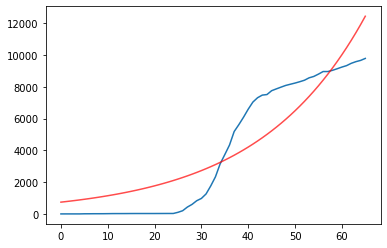

In [661]:
korea_covid = confirmed[confirmed["Country"] == "Korea, South"].squeeze()
plt.plot(days,korea_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, korea_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

Parameters: -939.6747380939553 45.40943407446957
Lambda: 0.02


<function matplotlib.pyplot.show(*args, **kw)>

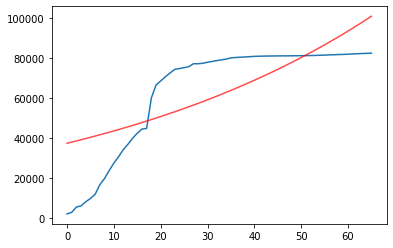

In [662]:
china_confirmed = confirmed[confirmed["Country"] == "China"]
china_covid = china_confirmed[dates].sum()
plt.plot(days,china_covid[aus_dates])

((loc, scale), covariance) = curve_fit(my_expon2, days, china_covid[aus_dates])
optimised_guesses = my_expon2(days, loc, scale)
print("Parameters:", loc, scale)
print("Lambda:", round(1/scale,2))
plt.plot(days, optimised_guesses, alpha=0.7, color='red')
plt.show

In [664]:
def update_data (date=DATE):
    confirmed = pd.read_csv(RAW_DATA+date+'/'+JHU+CONFIRMED+CSV)
    deaths = pd.read_csv(RAW_DATA+date+'/'+JHU+DEATHS+CSV)
    confirmed.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                     inplace=True)
    deaths.rename(columns={"Province/State": "State", "Country/Region": "Country"}, 
                     inplace=True)
    dates = confirmed.columns.drop(["State","Country","Lat","Long"])
    datetimes = pd.DatetimeIndex(dates)
    return (confirmed, deaths, dates, datetimes)

(confirmed, deaths, dates, datetimes) = update_data("2020-03-28")
confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


## Fact-checking the Ministers

At his [press conference](https://www.pm.gov.au/media/press-conference-australian-parliament-house-act-13) on Sunday evening on the 29th of March the Prime Minister, Scott Morrison, said the following:

>Earlier today, I reminded you in our earlier media conference that the rate of increase has been falling. _Towards this time last week, the rate of daily increase was up around 25 to 30 per cent. Today's rate of increase it actually has fallen to 9 per cent._ But there are no guarantees about how that goes forward. We need to continue to do the things that we've committed ourselves to do to save lives and save livelihoods and I want to thank Australians for their strong support and growing support for the measures that are necessary to do just that. 

This message was reinforced at a [press conference](https://www.greghunt.com.au/transcript-press-conference-canberra/) by the Health Minister, Greg Hunt, on the 31st of March, who stated:

>We were at 25 to 30 per cent growth just over a week ago, on a daily basis. Now, we have come down, in the last week, to the low teens, and the latest advice I have from the National Incident Centre this morning is that the last three days have been approximately 9 per cent, on average.

That seems like a huge drop from 25-30% down to 9% - the social distancing must be working!

But is it really indicative of the true situation? 

As data scientists, one of our jobs is to be able to fact-check the rhetoric against the data. So lets take a look at the data.

---

First, what does the PM mean by the "rate of daily increase"? Presumably if yesterday's total was 100, and today there were another 30 today, that's a 30% increase.

Let's examine the data up to the PM's press conference on the 29th.

In [680]:
(confirmed, deaths, dates, datetimes) = update_data("2020-03-29")
aus_confirmed = confirmed.loc[(confirmed["Country"] == "Australia") & 
                     (confirmed["State"] != "From Diamond Princess")]
aus_total = aus_confirmed[dates].sum()
aus_total.tail()

3/25/20    2364
3/26/20    2810
3/27/20    3143
3/28/20    3640
3/29/20    3984
dtype: int64

In [681]:
numdays = len(aus_total)
# array to store totals, daily changes and percentage changes
ausnums = np.zeros((3,numdays), dtype='int64')
ausnums[0] = aus_total.to_numpy()
ausnums

array([[   0,    0,    0,    0,    4,    5,    5,    6,    9,    9,   12,
          12,   12,   13,   13,   14,   15,   15,   15,   15,   15,   15,
          15,   15,   15,   15,   15,   15,   15,   15,   15,   15,   15,
          15,   15,   15,   15,   15,   25,   27,   30,   39,   52,   55,
          60,   63,   76,   91,  107,  128,  128,  200,  250,  297,  377,
         452,  568,  681,  791, 1071, 1549, 1682, 2044, 2364, 2810, 3143,
        3640, 3984],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [682]:
# subtract the day before to get daily changes
ausnums[1,1:] = ausnums[0,1:] - ausnums[0, 0:-1]
ausnums[:, 0:10]

array([[0, 0, 0, 0, 4, 5, 5, 6, 9, 9],
       [0, 0, 0, 0, 4, 1, 0, 1, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [683]:
# get ratio with day before as percentage
ausnums[2,1:] = ausnums[1,1:]/ausnums[0,0:-1]*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


What's gone wrong?

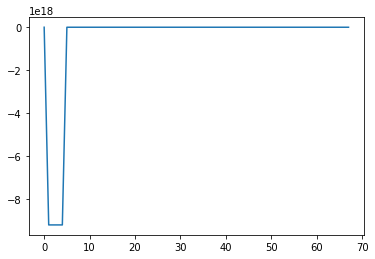

In [685]:
ausnums[2,5:] = ausnums[1,5:]/ausnums[0,4:-1]*100
plt.plot(ausnums[2])
plt.show()

Now what's gone wrong?

In [687]:
ausnums

array([[                   0,                    0,                    0,
                           0,                    4,                    5,
                           5,                    6,                    9,
                           9,                   12,                   12,
                          12,                   13,                   13,
                          14,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   15,
                          15,                   15,                   25,
                          27,         

In [688]:
np.iinfo(np.int64) # Bounds of a 64-bit integer

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

See [Numpy's data types](https://docs.scipy.org/doc/numpy/user/basics.types.html).

In [689]:
# get ratio with day before as percentage from day 5 onwards
ausnums[2,5:] = np.round(ausnums[1,5:]/ausnums[0,4:-1]*100)
# fill earlier dates with NaN
ausnums[2,0:5].fill(np.NaN)
ausnums[2]

array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808,                   25,
                          0,                   20,                   50,
                          0,                   33,                    0,
                          0,                    8,                    0,
                          8,                    7,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                    0,
                          0,                    0,                   67,
                          8,                   11, 

numpy has no NaN as an integer type.

Alternatives:
1. Use a number that won't arise (in your context), like -1 or -9223372036854775808 as a 'de facto' NaN - and remember to deal with it appropriately in subsequent work! (The writers of numpy have chosen to do this in this case rather than throw an Exception.)

2. Use floats for the whole numpy array, and round and cast for 'human consumption'. (Other examples you will see will do this cast automatically.)

3. Use pandas to allow different types (eg. int64 for the first two rows, float64 for the percentage)

Each has advantages and disadvantages. (1) is a 'quick and dirty' solution - your convention might not be understood by someone maintaining your code later. (2) loses the most appropriate type for integers (remember 0.9999999999 != 1) which can lead to bugs later. (3) is the 'cleanest', although there are overheads in using pandas.


In [690]:
cumulative = aus_confirmed[dates].sum()
daily = cumulative.copy()
daily.iloc[1:] = daily.iloc[1:] - daily.iloc[0:-1].to_numpy()
percentage = pd.Series(data=daily, copy=True, dtype='float64')
percentage.iloc[1:] = percentage.iloc[1:]/(cumulative.iloc[0:-1].to_numpy())*100
percentage

1/22/20     0.000000
1/23/20          NaN
1/24/20          NaN
1/25/20          NaN
1/26/20          inf
             ...    
3/25/20    15.655577
3/26/20    18.866328
3/27/20    11.850534
3/28/20    15.812918
3/29/20     9.450549
Length: 68, dtype: float64

In [691]:
percentage.iloc[0:5] = np.NaN
percentage

1/22/20          NaN
1/23/20          NaN
1/24/20          NaN
1/25/20          NaN
1/26/20          NaN
             ...    
3/25/20    15.655577
3/26/20    18.866328
3/27/20    11.850534
3/28/20    15.812918
3/29/20     9.450549
Length: 68, dtype: float64

In [692]:
percentage.iloc[-10:]

3/20/20    16.152717
3/21/20    35.398230
3/22/20    44.631186
3/23/20     8.586185
3/24/20    21.521998
3/25/20    15.655577
3/26/20    18.866328
3/27/20    11.850534
3/28/20    15.812918
3/29/20     9.450549
dtype: float64

These numbers don't match the PM's statement. Perhaps they are taking the percentage relative to that day's total. Bear in mind that PM's numbers may be using a different cut-off time.

In [693]:
percentage = pd.Series(data=daily, copy=True, dtype='float64')
percentage.iloc[1:] = percentage.iloc[1:]/(cumulative.iloc[1:].to_numpy())*100
percentage[-10:]

3/20/20    13.906448
3/21/20    26.143791
3/22/20    30.858618
3/23/20     7.907253
3/24/20    17.710372
3/25/20    13.536379
3/26/20    15.871886
3/27/20    10.594973
3/28/20    13.653846
3/29/20     8.634538
dtype: float64

These appear to match quite well.

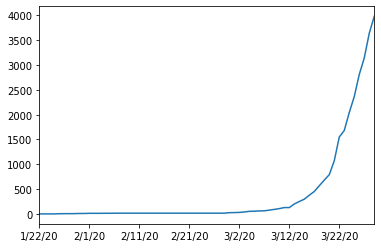

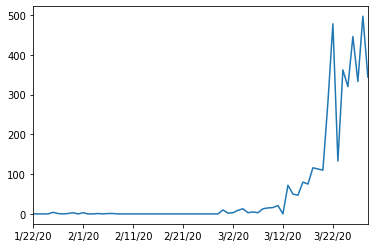

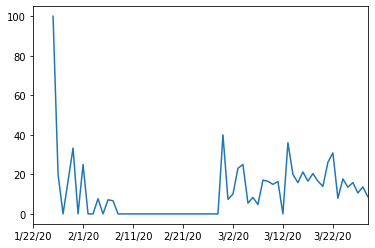

In [694]:
cumulative.plot()
plt.show()
daily.plot()
plt.show()
percentage.plot()
plt.show()

Let's look more closely at the last four weeks.

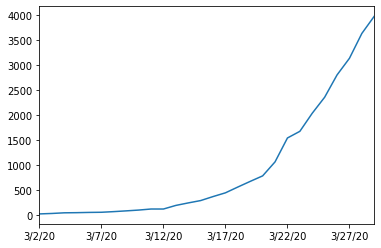

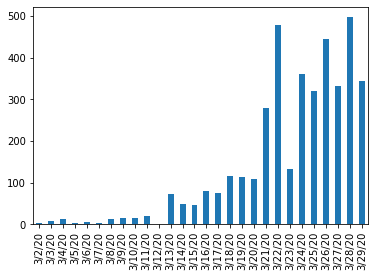

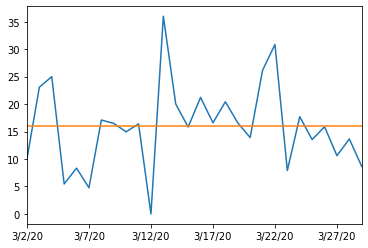

In [695]:
cumulative.iloc[-28:].plot()
plt.show()
daily.iloc[-28:].plot.bar()
plt.show()
percentage.iloc[-28:].plot()
plt.plot(np.arange(28), np.full((1,28),percentage.iloc[-28:].mean()).ravel())
plt.show()

> _Q: How would you rate the Prime Minister's statement?_

---

> _Q: How are the percentage rates affected by variations in the data, and variations in the collection and presentation (eg. cut-off times)?_

>_Do there seem to be any obvious outliers?_

>_How might we better visualise the __trend__?_

## Data Smoothing

In the percentage plot we also plotted the average over the period.

>_Q: What does the average tell us? What are some disadvantages of using the average?_

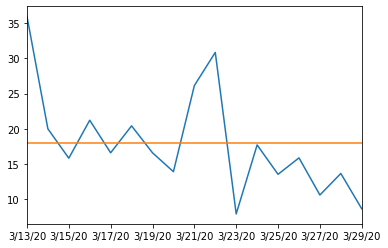

In [702]:
percentage.iloc[-17:].plot()
plt.plot(np.arange(17), np.full((1,17),percentage.iloc[-17:].mean()).ravel())
plt.show()

### Moving Averages

Moving Averages are commonly used for time-series data (and time signals).

![XJO Daily](Images/XJO_Daily.png)

The amount of smoothing depends on the _width_ of the moving window:

![XJO Weekly](Images/XJO_Weekly.png)

Let's calculate a moving average of our daily increases.

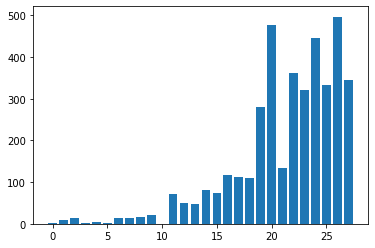

In [711]:
lastmonth = daily[-28:].to_numpy()
days = np.arange(len(lastmonth))
plt.bar(days, lastmonth)
plt.show()

In [736]:
def movingav3 (dataseries):
    avs = np.zeros_like(dataseries)
    for i in range(1,len(dataseries)-1):
        avs[i] = dataseries[i-1:i+2].sum()/3
    return avs

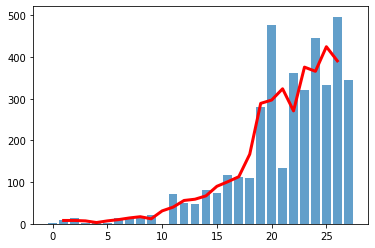

In [737]:
plt.bar(days, lastmonth, alpha=0.7)
plt.plot(days[1:-1], movingav3(lastmonth)[1:-1], color='red', linewidth=3)
plt.show()

In [738]:
def movingav3_loopless(dataseries):
    avs = np.zeros_like(dataseries)
    avs[1:-1] = (dataseries[0:-2] + dataseries[1:-1] + dataseries[2:])/3
    return avs

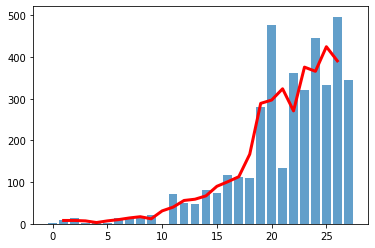

In [739]:
plt.bar(days, lastmonth, alpha=0.7)
plt.plot(days[1:-1], movingav3_loopless(lastmonth)[1:-1], color='red', linewidth=3)
plt.show()

We'll use a loop version here just because it's a little easier to visualise.

In [742]:
def movingav(dataseries, windowsize=3):
    (offset, remainder) = np.divmod(windowsize,2)
    if remainder == 0:
        raise ValueError("windowsize must be an odd number")
    avs = np.zeros_like(dataseries)
    for i in range(offset, len(dataseries)-offset):
        avs[i] = dataseries[i-offset:i+offset+1].sum()/windowsize
    return avs

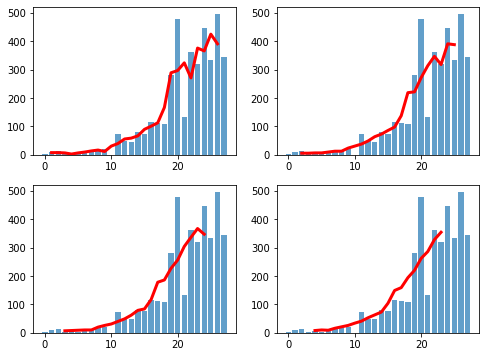

In [778]:
(fig, axs) = plt.subplots(2,2, figsize=(8,6))
for ax in axs.flatten():
    ax.bar(days, lastmonth, alpha=0.7) # do all bar plots
axs[0,0].plot(days[1:-1], movingav(lastmonth)[1:-1], color='red', linewidth=3)
axs[0,1].plot(days[2:-2], movingav(lastmonth, windowsize=5)[2:-2], color='red', linewidth=3)
axs[1,0].plot(days[3:-3], movingav(lastmonth, windowsize=7)[3:-3], color='red', linewidth=3)
axs[1,1].plot(days[4:-4], movingav(lastmonth, windowsize=9)[4:-4], color='red', linewidth=3)
plt.show()

> _Q: What seems a good window size for this data?_
>
> _Does this strengthen or weaken your argument about the PM's statement?_
>
> _Does it give you any new insights? (For example, what does it tell you about making statements about the trend up to the 29th March on the 29th March?)_

---

The moving average can be found under many names, such as a _rolling average_, _rolling mean_, _running average_, or even a _1-dimensional uniform filter_.

For those studying engineering, this is also an example of a _low-pass filter_.

---

Before we finish with moving averages, what about those end points? The bigger the window, the more we 'lose'. For many applications we want to keep the dimensions of our data the same.

Actually this is a very common problem. There is no "right" answer, simply because the data doesn't exist - or in the case of time-series data, doesn't exist _yet_.

So we use an approximation, or 'best guess'. A range of strategies commonly used can be found in [scipy's `uniform_filter1D`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.uniform_filter1d.html#scipy.ndimage.uniform_filter1d) &rarr;

> _Q: What would be a good choice for this application?_
>
> _What problems might you foresee with `reflect` (the default)?_ 
>
> _What about `wrap`? What sort of application might it be good for?_

Let's give it a go.

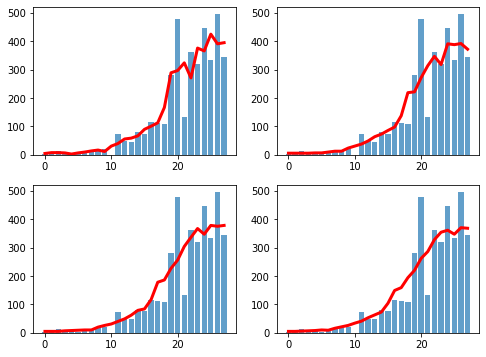

In [790]:
from scipy.ndimage import uniform_filter1d 
(fig, axs) = plt.subplots(2,2, figsize=(8,6))
for i, ax in enumerate(axs.flatten()):
    ax.bar(days, lastmonth, alpha=0.7) 
    windowsize = 3 + 2 * i
    ax.plot(days, uniform_filter1d(lastmonth, windowsize, mode='nearest'), 
            color='red', linewidth=3)
plt.show()

Better still...

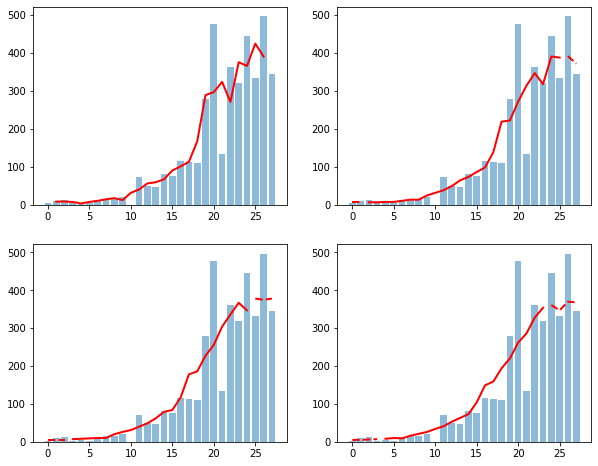

In [802]:
from scipy.ndimage import uniform_filter1d 
(fig, axs) = plt.subplots(2,2, figsize=(10,8))
for i, ax in enumerate(axs.flatten()):
    ax.bar(days, lastmonth, alpha=0.5) 
    windowsize = 3 + 2 * i
    offset = i + 1
    runningav = uniform_filter1d(lastmonth, windowsize, mode='nearest')
    ax.plot(days[offset:len(runningav)-offset], runningav[offset:len(runningav)-offset],
            color='red', linewidth=2)
    ax.plot(days[0:offset], runningav[0:offset], 
            color='red', linewidth=2, linestyle='dashed')
    ax.plot(days[len(runningav)-offset:], runningav[len(runningav)-offset:],
            color='red', linewidth=2, linestyle='dashed')
plt.show()

The dashed lines tell the reader that these values are a projection (not yet confirmed).

### Other common smoothing functions

64
31


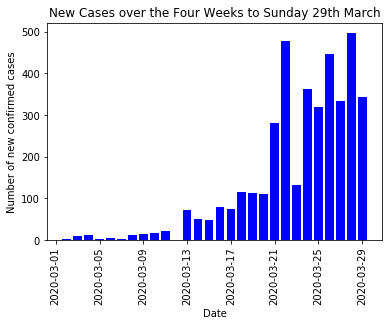

In [621]:

numdays = len(aus_dates)
print(numdays)
xs = np.arange(numdays)
#((loc, scale), covariance) = curve_fit(my_expon2, xs, aus_total[aus_dates])
plt.bar(datetimes[-28:],daily.iloc[-28:], color='blue')
#optimised_guesses = my_expon2(xs, loc, scale)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
print(len(datetimes[-31:]))
xlab = np.arange(0,31,5)
dl = datetimes[-31:]
locs = dl[xlab]
labels = dl.day[xlab]
#plt.xticks(locs, labels)
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Number of new confirmed cases")
plt.title("New Cases over the Four Weeks to Sunday 29th March")
plt.show()


In [724]:
def movingav (dataseries, windowsize=3):
    halfwin = np.floor_divide(windowsize)
    avs = np.zeros_like(dataseries)
    for i in range(len(dataseries-1)):
        avs[i] = dataseries[i-1:i+1].sum()/3
    return avs

64
[Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-29 00:00:00')]
[26.143790849673206, 30.858618463524856, 8.634538152610443]
['21 March', '22 March', '29 March']
31


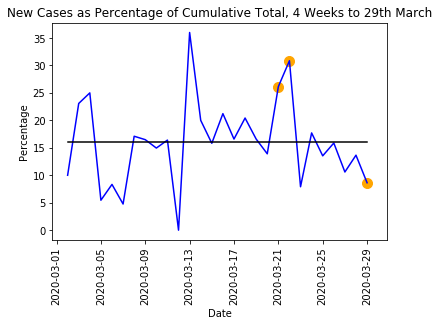

In [620]:

numdays = len(aus_dates)
print(numdays)
xs = np.arange(numdays)
#((loc, scale), covariance) = curve_fit(my_expon2, xs, aus_total[aus_dates])
plt.plot(datetimes[-28:],percentage.iloc[-28:], color='blue')
plt.plot(datetimes[-28:], np.full((1,28), percentage.iloc[-28:].mean()).ravel(), color='black')
pmdates = [datetimes[-9], datetimes[-8], datetimes[-1]]
print(pmdates)
pmperc = [percentage[-9], percentage[-8], percentage[-1]]
print(pmperc)

pmdays = [str(dt.day)+" "+dt.month_name() for dt in pmdates]
print(pmdays)

plt.scatter(pmdates, pmperc, s=100, marker='o', color='orange')
#optimised_guesses = my_expon2(xs, loc, scale)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
print(len(datetimes[-31:]))
xlab = np.arange(0,28,5)
dl = datetimes[-28:]
locs = dl[xlab]
labels = dl.day[xlab]
#plt.xticks(locs, labels)
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("New Cases as Percentage of Cumulative Total, 4 Weeks to 29th March")
plt.show()


64
31
[Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-22 00:00:00'), Timestamp('2020-03-29 00:00:00')]
[280, 478, 344]
['21 March', '22 March', '29 March']


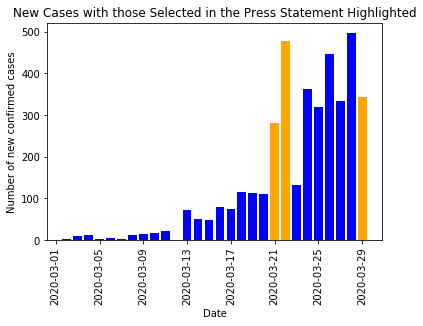

In [624]:

numdays = len(aus_dates)
print(numdays)
xs = np.arange(numdays)
#((loc, scale), covariance) = curve_fit(my_expon2, xs, aus_total[aus_dates])
plt.bar(datetimes[-28:],daily.iloc[-28:], color='blue')
#optimised_guesses = my_expon2(xs, loc, scale)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
print(len(datetimes[-31:]))
pmdates = [datetimes[-9], datetimes[-8], datetimes[-1]]
print(pmdates)
pmdaily = [daily[-9], daily[-8], daily[-1]]
print(pmdaily)

pmdays = [str(dt.day)+" "+dt.month_name() for dt in pmdates]
print(pmdays)

plt.bar(pmdates, pmdaily, color='orange')
xlab = np.arange(0,31,5)
dl = datetimes[-31:]
locs = dl[xlab]
labels = dl.day[xlab]
#plt.xticks(locs, labels)
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Number of new confirmed cases")
plt.title("New Cases with those Selected in the Press Statement Highlighted")
plt.show()


In [423]:
se = pd.Series([1,2,3])
se3 = se.copy()
se2 = pd.Series([0,1,2])
se.iloc[1:] = se.iloc[1:] - se2.iloc[:-1].to_numpy()
se

0    1
1    2
2    2
dtype: int64

In [395]:
#aus_totals = pd.DataFrame(index = ["Cumulative","Daily","Percentage"],
#                          columns=dates, dtypes={"Cumulative": np.int64, "Daily": np.int64, 
#                                                 "Percentage": np.float64})
init = {'Cumulative': np.zeros(numdays), 'Daily': np.zeros(numdays), 'Percentage': np.full(numdays,np.NaN)}
aus_totals = pd.DataFrame.from_dict(init)
aus_totals


,Cumulative,Daily,Percentage
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
63,0.0,0.0,NaN
64,0.0,0.0,NaN
65,0.0,0.0,NaN
66,0.0,0.0,NaN


In [378]:
ausnums = np.zeros((3,numdays), dtype='Int64')
ausnums[0] = aus_total.to_numpy()
# subtract the day before to get daily changes
ausnums[1,1:] = ausnums[0,1:] - ausnums[0, 0:-1]
# get ratio with day before as percentage from day 5
ausnums[2,5:] = np.round(ausnums[1,5:]/ausnums[0,4:-1]*100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [356]:
np.array([np.NaN], dtype=np.int64)

ValueError: cannot convert float NaN to integer

In [359]:
a = np.array([1, 2, 3])
print(type(a[0]))
print(type(a))
a[0] = np.NAN
a

<class 'numpy.int64'>
<class 'numpy.ndarray'>


ValueError: cannot convert float NaN to integer

In [372]:
ausnums[:,-10:]

array([[ 791, 1071, 1549, 1682, 2044, 2364, 2810, 3143, 3640, 3984],
       [ 110,  280,  478,  133,  362,  320,  446,  333,  497,  344],
       [  16,   35,   45,    9,   22,   16,   19,   12,   16,    9]])

Perhaps he means 9% of what it rose to, rather than what it was?

In [284]:
ausnums[2,5:] = np.round(ausnums[1,5:]/ausnums[0,5:]*100)
ausnums[:,-10:]

array([[ 681,  791, 1071, 1549, 1682, 2044, 2364, 2810, 3143, 3640],
       [ 113,  110,  280,  478,  133,  362,  320,  446,  333,  497],
       [  17,   14,   26,   31,    8,   18,   14,   16,   11,   14]])

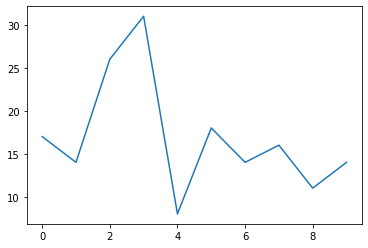

In [291]:
plt.plot(ausnums[2,-10:])
plt.show()

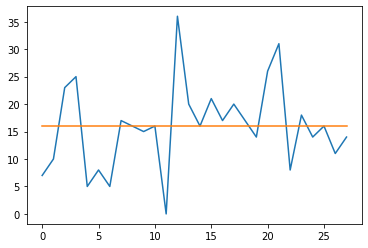

In [301]:
plt.plot(np.arange(28), ausnums[2,-28:])
av = np.full((1,28), np.mean(ausnums[2,-28:])).ravel()
plt.plot(np.arange(28), av)
plt.show()

## Curve Fitting and Optimisation

Are WA's infections really increasing exponentially? 

Don't believe the press! Let's find out for ourselves.

In [149]:
aus_covid = covid.loc[(covid["Country"] == "Australia") & 
                     (covid["State"] != "From Diamond Princess")]
states = aus_covid.groupby("State")
states.tail(3)

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
564,2020-03-22,Australia,Australian Capital Territory,-35.4735,149.0124,19,0,0
565,2020-03-23,Australia,Australian Capital Territory,-35.4735,149.0124,32,0,0
566,2020-03-24,Australia,Australian Capital Territory,-35.4735,149.0124,39,0,0
627,2020-03-22,Australia,New South Wales,-33.8688,151.2093,669,4,6
628,2020-03-23,Australia,New South Wales,-33.8688,151.2093,669,4,6
629,2020-03-24,Australia,New South Wales,-33.8688,151.2093,818,0,7
690,2020-03-22,Australia,Northern Territory,-12.4634,130.8456,5,0,0
691,2020-03-23,Australia,Northern Territory,-12.4634,130.8456,5,0,0
692,2020-03-24,Australia,Northern Territory,-12.4634,130.8456,6,0,0
753,2020-03-22,Australia,Queensland,-28.0167,153.4000,259,8,0


In [153]:
WA = aus_covid.loc[(aus_covid["State"] == "Western Australia") & (aus_covid["Confirmed"]>0)]
WA.tail()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
1003,2020-03-20,Australia,Western Australia,-31.9505,115.8605,64,0,1
1004,2020-03-21,Australia,Western Australia,-31.9505,115.8605,90,0,1
1005,2020-03-22,Australia,Western Australia,-31.9505,115.8605,120,0,1
1006,2020-03-23,Australia,Western Australia,-31.9505,115.8605,140,0,1
1007,2020-03-24,Australia,Western Australia,-31.9505,115.8605,175,0,1


In [154]:
len(WA)

25

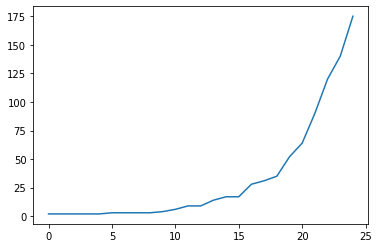

In [155]:
plt.plot(np.arange(len(WA)),WA["Confirmed"])
plt.show()

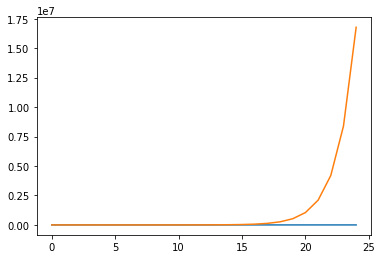

In [156]:
xs = np.arange(len(WA))
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)
plt.plot(xs, guesses)
plt.show()

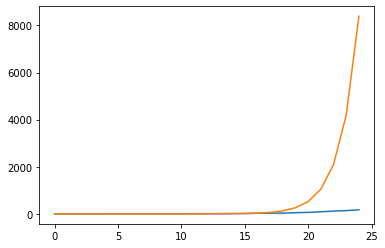

In [157]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs)/2000
plt.plot(xs, guesses)
plt.show()

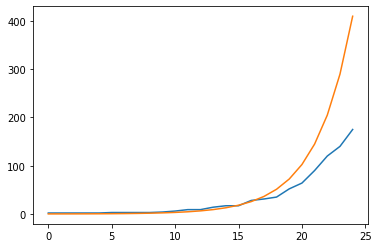

In [158]:
plt.plot(xs,WA["Confirmed"])
guesses = np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

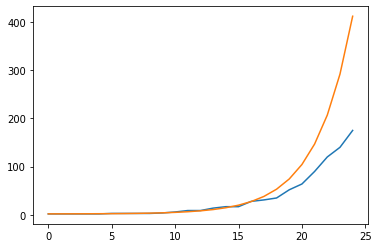

In [159]:
plt.plot(xs,WA["Confirmed"])
guesses = 2 + np.exp2(xs/2)/10
plt.plot(xs, guesses)
plt.show()

Pretty close!!

But lets get the computer to do the work of finding the best match.

First, we need to decide what form the function we want try and match to the data will take, and what _parameters_ we will vary.

We'll define a function of the form `a + b * 2^(cx)`.
As demonstrated above:
* `a` "shifts" the function in the y direction
* `b` "scales" (stretches or shrinks) the function
* `c` determines the "steepness" of the function


In [160]:
def my_exp (x, a, b, c):
    return (a + b * np.exp2(x/c))

In [161]:
from scipy.optimize import curve_fit

In [162]:
curve_fit(my_exp, xs, WA["Confirmed"])

(array([0.43867386, 0.50453269, 2.83392576]),
 array([[ 1.09790799, -0.06494755, -0.06089088],
        [-0.06494755,  0.00764054,  0.0074622 ],
        [-0.06089088,  0.0074622 ,  0.00733182]]))

Lets capture the parameters. 

Remember our guesses were 2, 0.1, and 0.5. How did we compare?

In [163]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])
(a, b, c)

(0.43867386375047196, 0.5045326871695046, 2.83392576463398)

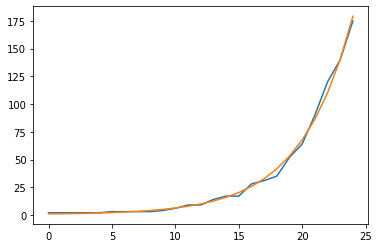

In [164]:
((a, b, c), covariance) = curve_fit(my_exp, xs, WA["Confirmed"])

plt.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
plt.plot(xs, optimised_guesses)
plt.show()

Parameters: 0.43867386375047196 0.5045326871695046 2.83392576463398


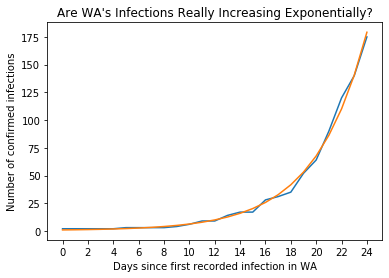

In [165]:
fig, ax = plt.subplots()
ax.plot(xs,WA["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
ax.plot(xs, optimised_guesses)
daynums = np.arange(0, len(xs), 2)
ax.set_xticks(daynums)
ax.set_xlabel("Days since first recorded infection in WA")
ax.set_ylabel("Number of confirmed infections")
ax.set_title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

For interest, lets include all the data (the exponential function tends to zero as x tends to minus infinity, so we don't expect the fit to change much).

In [167]:
WA_all = aus_covid.loc[(aus_covid["State"] == "Western Australia")]
WA_all.head()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
945,2020-01-22,Australia,Western Australia,-31.9505,115.8605,0,0,0
946,2020-01-23,Australia,Western Australia,-31.9505,115.8605,0,0,0
947,2020-01-24,Australia,Western Australia,-31.9505,115.8605,0,0,0
948,2020-01-25,Australia,Western Australia,-31.9505,115.8605,0,0,0
949,2020-01-26,Australia,Western Australia,-31.9505,115.8605,0,0,0


Parameters: 0.8782496063098404 -3.635337737927504e-14 0.9999999992810996


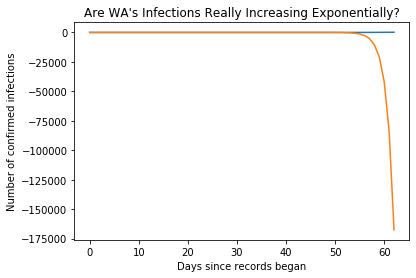

In [168]:
xs = np.arange(len(WA_all))
((a, b, c), covariance) = curve_fit(my_exp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Parameters: 1.2040919145987863 -4.734219978711705e-15 1.0000000033686993


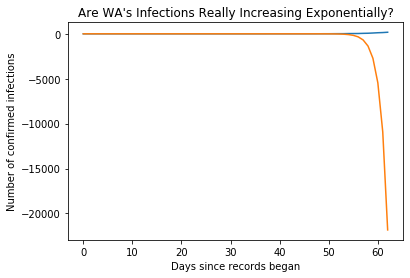

In [169]:
xs = np.arange(len(WA_all))
cases = WA_all["Confirmed"] < 1
print(np.int8(cases))
std = 10 * np.int8(cases) + 1
init = [0, ]

((a, b, c), covariance) = curve_fit(my_exp, xs, WA_all["Confirmed"], sigma=std)
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_exp(xs, a, b, c)
print("Parameters:", a, b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

Which one are the press likely to use??

Notice that by starting at zero, the "vertical shift" of the first parameter is not really needed. 

Lets see if we can remove the first parameter and still get a good fit.

In [170]:
def my_zexp (x, b, c):
    return (b * np.exp2(x/c))

Parameters: 4.478066055802924e-14 1.0000000100405888


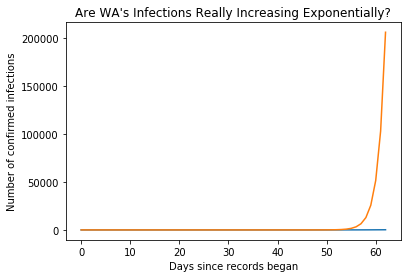

In [171]:
((b, c), covariance) = curve_fit(my_zexp, xs, WA_all["Confirmed"])
plt.plot(xs,WA_all["Confirmed"])
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses)
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are WA's Infections Really Increasing Exponentially?")
plt.show()

We also call these parameters _independent variables_ (we can set them independently of each other) and we call the number of independent variables the _degrees of freedom_.

`my_exp` has 3 degrees of freedom, while `my_zexp` has only 2 degrees of freedom.

Generally we like to use as _few degrees of freedom as we can_ to fit the data, so that we can understand the general trend of the data.

Fitting a function with too many degrees of freedom often results in _over-fitting_, and describes the (random) variability in the data rather than the general trend.

You will meet these concepts again in the __Statistical Learning__ unit!

## GroupBy

In [173]:
combined = aus_covid.groupby("Date", as_index=False)
aus_nz = aus_covid[aus_covid["Confirmed"]>0]
aus_combined_nz = aus_nz.groupby("Date", as_index=False)

In [174]:
combined.sum().tail()

,Date,Lat,Long,Confirmed,Recovered,Deaths
58,2020-03-20,-255.9695,1129.8623,791,26,7
59,2020-03-21,-255.9695,1129.8623,1071,26,7
60,2020-03-22,-255.9695,1129.8623,1549,88,7
61,2020-03-23,-255.9695,1129.8623,1682,88,7
62,2020-03-24,-255.9695,1129.8623,2044,0,8


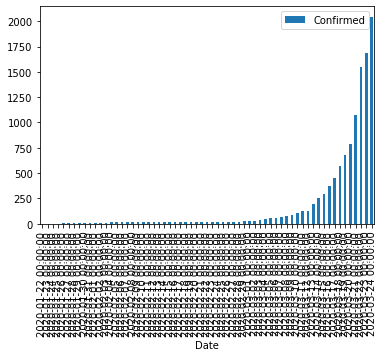

In [175]:
combined.sum().plot.bar("Date","Confirmed")

Parameters: 0.0032712199139007174 3.2143270331362688


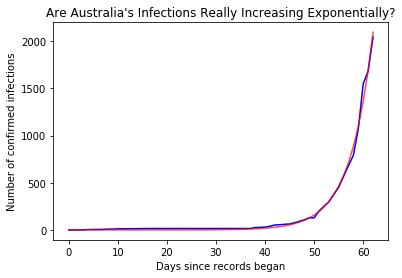

In [176]:
xs = np.arange(len(combined))
((b, c), covariance) = curve_fit(my_zexp, xs, combined.sum()["Confirmed"])
plt.plot(xs,combined.sum()["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since records began")
plt.ylabel("Number of confirmed infections")
plt.title("Are Australia's Infections Really Increasing Exponentially?")
plt.show()

Parameters: 0.007750327888312212 3.214327060495454


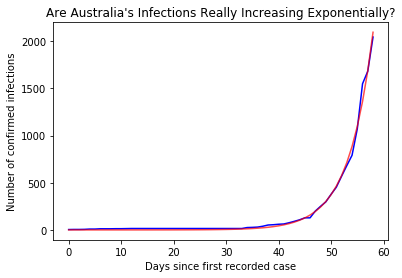

In [177]:
xs = np.arange(len(aus_combined_nz))
((b, c), covariance) = curve_fit(my_zexp, xs, aus_combined_nz.sum()["Confirmed"])
plt.plot(xs,aus_combined_nz.sum()["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Are Australia's Infections Really Increasing Exponentially?")
plt.show()

## Country Comparisons

In [178]:
def my_exp2 (x, a, b):
    return (np.exp2(a*x + b))

In [179]:
def country_plot (country, status="Confirmed", fit_exp=False, limit = np.inf):
    country_data = covid[covid["Country"] == country]
    if not country_data["State"].isin([""]).all():
        print("Warning: country data could be divided over regions")
    country_nonzero = country_data[(country_data[status] > 0) & (country_data[status] < limit)]
#    print(country_nonzero.max())
    xs = np.arange(len(country_nonzero))
    plt.plot(xs,country_nonzero[status], color='blue')

    if fit_exp:
        ((b, c), covariance) = curve_fit(my_exp2, xs, country_nonzero[status])
        optimised_guesses = my_exp2(xs, b, c)
        print("Parameters:", b, c)
        plt.plot(xs, optimised_guesses, alpha=0.7, color='red')

    plt.xlabel("Days since first recorded case")
    plt.ylabel("Number "+status)
    plt.title(country)
    plt.show()
    

In [180]:
def country_plot2 (country, statuses=["Confirmed","Deaths"], fit_exp=False, limit = np.inf):
    country_data = covid[covid["Country"] == country]
    country_combined = country_data.groupby("Date").sum()
    country_nonzero = country_combined[(country_combined["Confirmed"] > 0) & 
                                       (country_combined["Confirmed"] < limit)]

    xs = np.arange(len(country_nonzero))
    for status in statuses:
        plt.plot(xs,country_nonzero[status])

        if fit_exp:
            ((b, c), covariance) = curve_fit(my_exp2, xs, country_nonzero[status])
            optimised_guesses = my_exp2(xs, b, c)
            print("Parameters:", b, c)
            plt.plot(xs, optimised_guesses, alpha=0.7, color='gray')

    plt.xlabel("Days since first recorded case")
    plt.ylabel("Number "+status)
    plt.title(country)
    plt.show()
    

### Italy

In [181]:
italy_covid = covid[covid["Country"] == "Italy"]
italy_covid.tail()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
8689,2020-03-20,Italy,,43.0,12.0,47021,4440,4032
8690,2020-03-21,Italy,,43.0,12.0,53578,6072,4825
8691,2020-03-22,Italy,,43.0,12.0,59138,7024,5476
8692,2020-03-23,Italy,,43.0,12.0,63927,7024,6077
8693,2020-03-24,Italy,,43.0,12.0,69176,0,6820


Parameters: 0.1921429292017046 6.011048675092953
Parameters: 0.23030930764165777 0.6183404515968682


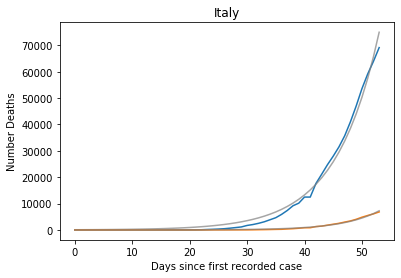

In [182]:
country_plot2("Italy", statuses=["Confirmed","Deaths"], fit_exp=True)

Parameters: 0.27203847036324713 1.2080053345227069
Parameters: 0.36768052107398047 -7.621915463492144


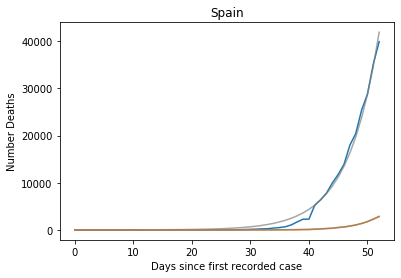

In [196]:
country_plot2("Spain", statuses=["Confirmed","Deaths"], fit_exp=True)

Parameters: 0.29478022583379104 -2.5861956456093385
Parameters: 0.370608037031422 -10.856106053101572


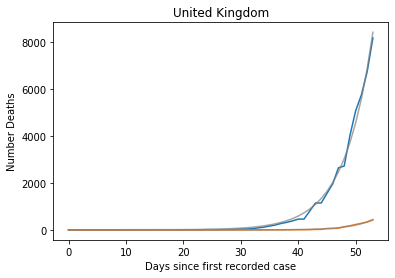

In [197]:
country_plot2("United Kingdom", statuses=["Confirmed","Deaths"], fit_exp=True)

Parameters: 0.10207669644218892 2.7507005761488457
Parameters: 0.46342598971128174 -26.949466228137993


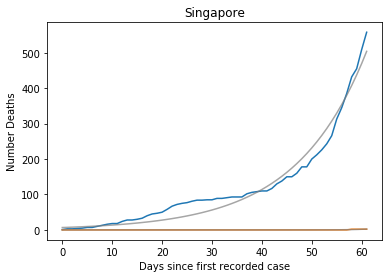

In [201]:
country_plot2("Singapore", statuses=["Confirmed","Deaths"], fit_exp=True)

Parameters: 0.40800460307269026 -9.524150194823159
Parameters: 0.3823539039980562 -14.236463461831018


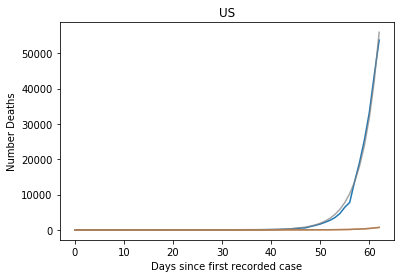

In [199]:
country_plot2("US", statuses=["Confirmed","Deaths"], fit_exp=True)

Parameters: 0.3111071102381673 -7.011526992876877
Parameters: 0.13429693668670628 -4.673386008989395
Parameters: 0.08018908272261067 0.8460248579446311


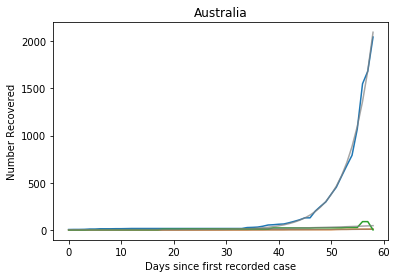

In [206]:
country_plot2("Australia", statuses=["Confirmed","Deaths","Recovered"],fit_exp=True)

Parameters: 0.2435555569934818 -0.0936586590486064
Parameters: 0.3815214790078666 -12.757815065817967


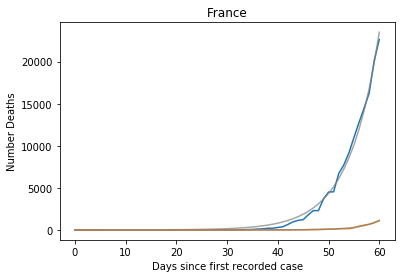

In [184]:
country_plot2("France", fit_exp=True)

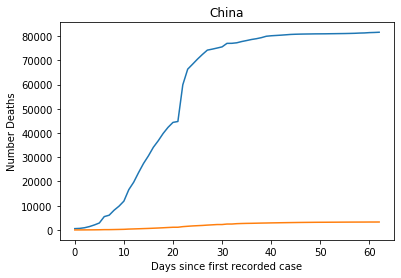

In [185]:
country_plot2("China", fit_exp=False)

Parameters: 0.08044246399656302 8.522277285670823
Parameters: 0.10780753604693423 0.3485259895081262


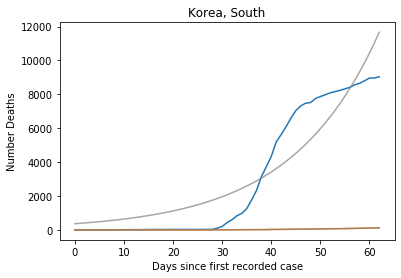

In [186]:
covid[covid["Country"].between("Ko", "Kp")]
country_plot2("Korea, South", fit_exp=True)

In [204]:
newzealand_covid = covid[covid["Country"] == "New Zealand"]
newzealand_covid.tail()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
10768,2020-03-20,New Zealand,,-40.9006,174.886,39,0,0
10769,2020-03-21,New Zealand,,-40.9006,174.886,52,0,0
10770,2020-03-22,New Zealand,,-40.9006,174.886,102,0,0
10771,2020-03-23,New Zealand,,-40.9006,174.886,102,0,0
10772,2020-03-24,New Zealand,,-40.9006,174.886,155,0,0


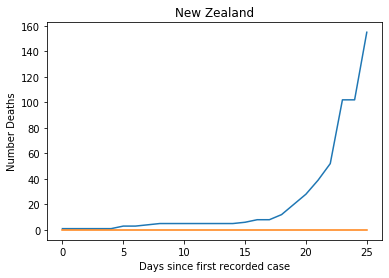

In [205]:
country_plot2("New Zealand", statuses=["Confirmed","Deaths"], fit_exp=False)

In [187]:
italy_comparative = italycovid[(italycovid["Confirmed"]<1500) & (italycovid["Confirmed"]>0)]
italy_comparative.tail()

NameError: name 'italycovid' is not defined

In [188]:
plt.plot(np.arange(len(italy_comparative)),italy_comparative["Confirmed"])
plt.show()

NameError: name 'italy_comparative' is not defined

In [189]:
xs = np.arange(len(italy_comparative))
((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
plt.plot(xs,italy_nz["Confirmed"], color='blue')
optimised_guesses = my_zexp(xs, b, c)
print("Parameters:", b, c)
plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

NameError: name 'italy_comparative' is not defined

In [190]:
xs = np.arange(len(italycovid))
plt.plot(xs,italycovid["Confirmed"], color='blue')
#((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
#optimised_guesses = my_zexp(xs, b, c)
#print("Parameters:", b, c)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

NameError: name 'italycovid' is not defined

## Spain

In [191]:
overall_plot("Spain", fitexp=True, limit=1600)
overall_plot("Italy", fitexp=True, limit=1400)
overall_plot("Singapore")
overall_plot("South Korea")
overall_plot("China")

NameError: name 'overall_plot' is not defined

In [192]:
spain_covid = covid[covid["Country"] == "Spain"]
spain_covid.tail(20)



,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
12706,2020-03-05,Spain,,40.0,-4.0,259,2,3
12707,2020-03-06,Spain,,40.0,-4.0,400,2,5
12708,2020-03-07,Spain,,40.0,-4.0,500,30,10
12709,2020-03-08,Spain,,40.0,-4.0,673,30,17
12710,2020-03-09,Spain,,40.0,-4.0,1073,32,28
12711,2020-03-10,Spain,,40.0,-4.0,1695,32,35
12712,2020-03-11,Spain,,40.0,-4.0,2277,183,54
12713,2020-03-12,Spain,,40.0,-4.0,2277,183,55
12714,2020-03-13,Spain,,40.0,-4.0,5232,193,133
12715,2020-03-14,Spain,,40.0,-4.0,6391,517,195


In [193]:
france_covid = covid.loc[covid["Country"] == "France"]
france_covid.head()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
6741,2020-01-22,France,French Guiana,3.9339,-53.1258,0,0,0
6742,2020-01-23,France,French Guiana,3.9339,-53.1258,0,0,0
6743,2020-01-24,France,French Guiana,3.9339,-53.1258,0,0,0
6744,2020-01-25,France,French Guiana,3.9339,-53.1258,0,0,0
6745,2020-01-26,France,French Guiana,3.9339,-53.1258,0,0,0


In [194]:
france_covid["State"].isin([""])

6741    False
6742    False
6743    False
6744    False
6745    False
        ...  
7366     True
7367     True
7368     True
7369     True
7370     True
Name: State, Length: 630, dtype: bool

In [195]:
spain_covid = covid.loc[covid["Country"] == "Spain"]
spain_covid.tail()

,Date,Country,State,Lat,Long,Confirmed,Recovered,Deaths
12721,2020-03-20,Spain,,40.0,-4.0,20410,1588,1043
12722,2020-03-21,Spain,,40.0,-4.0,25374,2125,1375
12723,2020-03-22,Spain,,40.0,-4.0,28768,2575,1772
12724,2020-03-23,Spain,,40.0,-4.0,35136,2575,2311
12725,2020-03-24,Spain,,40.0,-4.0,39885,0,2808


In [ ]:
xs = np.arange(len(spain_covid))
plt.plot(xs,italycovid["Confirmed"], color='blue')
#((b, c), covariance) = curve_fit(my_zexp, xs, italy_nz["Confirmed"])
#optimised_guesses = my_zexp(xs, b, c)
#print("Parameters:", b, c)
#plt.plot(xs, optimised_guesses, alpha=0.7, color='red')
plt.xlabel("Days since first recorded case")
plt.ylabel("Number of confirmed infections")
plt.title("Italy")
plt.show()

In [ ]:
italy_nz.plot.bar(["Confirmed"])

In [ ]:
import json
with open("datapackage.json",'r') as file:
    di = json.load(file)
di

In [ ]:
data = pd.read_csv("time-series-19-covid-combined.csv", converters=di)
data


In [ ]:
for datum in data.iloc[1]:
    print(type(datum))

In [ ]:
import datapackage


In [ ]:
j = pd.read_json("datapackage.json")
j.head()

In [ ]:
mytypes = {"Province/State": str, "Country/Region": str,
           "Lat": np.float64, "Long": np.float64,
           "Date": str, 
           "Confirmed": np.int64, "Recovered": np.int64, "Deaths": np.int64}
data = pd.read_csv("time-series-19-covid-combined.csv", dtype=mytypes, na_filter=False)
data

In [ ]:
for datum in data.iloc[1]:
    print(type(datum))

In [ ]:
type(data["Date"])

In [ ]:
data["Date"].dtypes


In [ ]:
data.infer_objects()